In [1]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
train_scaled = train_input / 255

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, 
                                                                        test_size=0.2, 
                                                                        random_state=42)

In [6]:
# 모델 구축
from keras.layers import Flatten, Dense

model = keras.Sequential()

model.add(Flatten(input_shape=(28,28))),
model.add(Dense(100, activation='relu')),
model.add(Dense(10, activation='softmax'))


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-02 23:09:39.246475: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-02 23:09:39.247498: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [9]:
# 모델 학습
hist = model.fit(train_scaled, train_target, epochs=5, verbose=2)

Epoch 1/5


2023-03-02 23:12:28.539752: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-02 23:12:28.800470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 - 8s - loss: 0.5309 - accuracy: 0.8154 - 8s/epoch - 5ms/step
Epoch 2/5
1500/1500 - 6s - loss: 0.3937 - accuracy: 0.8586 - 6s/epoch - 4ms/step
Epoch 3/5
1500/1500 - 6s - loss: 0.3550 - accuracy: 0.8744 - 6s/epoch - 4ms/step
Epoch 4/5
1500/1500 - 6s - loss: 0.3329 - accuracy: 0.8812 - 6s/epoch - 4ms/step
Epoch 5/5
1500/1500 - 6s - loss: 0.3206 - accuracy: 0.8849 - 6s/epoch - 4ms/step


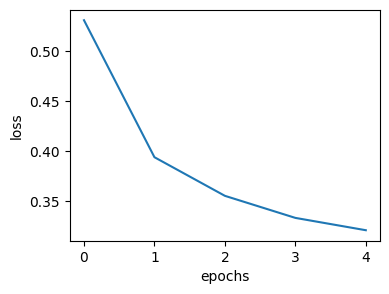

In [11]:
# loss 시각화
plt.figure(figsize=(4,3))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

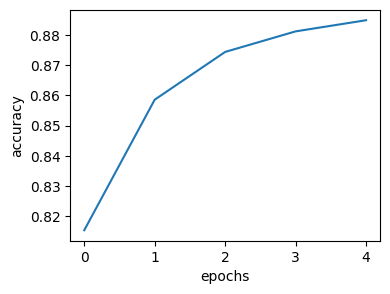

In [12]:
# accuracy 시각화
plt.figure(figsize=(4,3))
plt.plot(hist.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## 2. 검증 손실

In [13]:
model2 = keras.Sequential()

model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [14]:
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
hist2 = model2.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

2023-03-02 23:19:40.226024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-02 23:19:46.969817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [15]:
hist2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

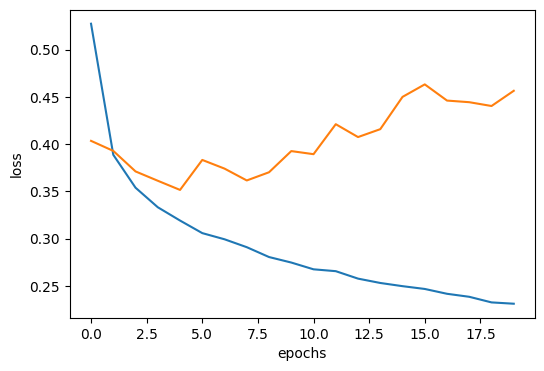

In [17]:
# loss 시각화
plt.figure(figsize=(6,4))
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

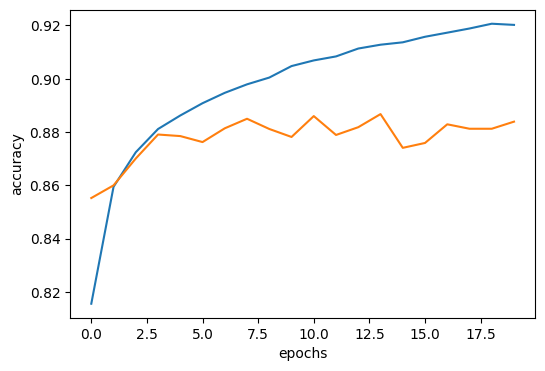

In [16]:
# accuracy 시각화
plt.figure(figsize=(6,4))
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## 3. 드롭아웃

In [18]:
from keras.layers import Dropout

model3 = keras.Sequential()
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(10, activation='softmax'))

In [19]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 모델 컴파일 및 훈련
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
hist3 = model3.fit(train_scaled, train_target, epochs=20, verbose=1, 
          validation_data=(val_scaled, val_target))

Epoch 1/20
   1/1500 [..............................] - ETA: 8:27 - loss: 0.3148 - accuracy: 0.8438

2023-03-02 23:32:06.316441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1493/1500 [============================>.] - ETA: 0s - loss: 0.4480 - accuracy: 0.8407

2023-03-02 23:32:15.924618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 11s 7ms/step - loss: 0.4477 - accuracy: 0.8410 - val_loss: 0.4007 - val_accuracy: 0.8596
Epoch 2/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4094 - accuracy: 0.8570 - val_loss: 0.4201 - val_accuracy: 0.8528
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3915 - accuracy: 0.8630 - val_loss: 0.3696 - val_accuracy: 0.8705
Epoch 4/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3829 - accuracy: 0.8682 - val_loss: 0.3822 - val_accuracy: 0.8700
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3755 - accuracy: 0.8729 - val_loss: 0.3794 - val_accuracy: 0.8698
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3724 - accuracy: 0.8737 - val_loss: 0.4138 - val_accuracy: 0.8650
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3643 - accuracy: 0.8766 - val_loss: 0.4000 - val_accuracy: 0.8

In [24]:
hist3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

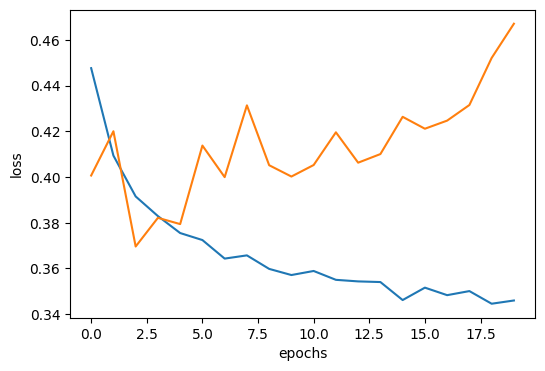

In [25]:
# loss 시각화
plt.figure(figsize=(6,4))
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

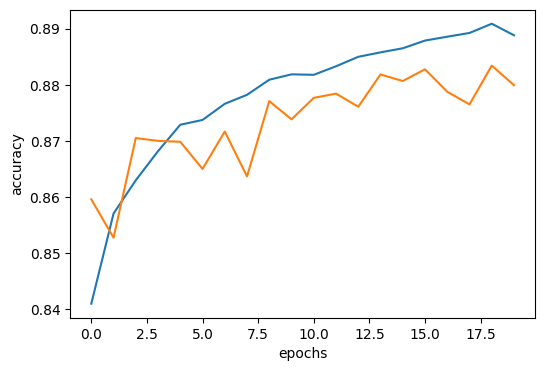

In [26]:
# accuracy 시각화
plt.figure(figsize=(6,4))
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## 4. 콜백

In [27]:
from keras.callbacks import ModelCheckpoint

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = ModelCheckpoint('best-model.h5', save_best_only=True)

model3.fit(train_scaled, train_target, epochs=20, verbose=1,
           validation_data=(val_scaled, val_target),
           callbacks=[checkpoint_cb])



Epoch 1/20


2023-03-02 23:43:38.889884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1490/1500 [============================>.] - ETA: 0s - loss: 0.3342 - accuracy: 0.8855

2023-03-02 23:43:46.710879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 9s 6ms/step - loss: 0.3339 - accuracy: 0.8853 - val_loss: 0.3848 - val_accuracy: 0.8743
Epoch 2/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3191 - accuracy: 0.8867 - val_loss: 0.3901 - val_accuracy: 0.8733
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3098 - accuracy: 0.8886 - val_loss: 0.3887 - val_accuracy: 0.8722
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3010 - accuracy: 0.8894 - val_loss: 0.3758 - val_accuracy: 0.8821
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2964 - accuracy: 0.8921 - val_loss: 0.3774 - val_accuracy: 0.8791
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2865 - accuracy: 0.8949 - val_loss: 0.3896 - val_accuracy: 0.8764
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2850 - accuracy: 0.8965 - val_loss: 0.3603 - val_accuracy: 0.8810
Epo

In [28]:
model3_eval = keras.models.load_model('best-model.h5')
model3_eval.evaluate(val_scaled, val_target)

 24/375 [>.............................] - ETA: 1s - loss: 0.2970 - accuracy: 0.9036

2023-03-02 23:47:30.103510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 2s 4ms/step - loss: 0.3552 - accuracy: 0.8887


[0.3551579415798187, 0.8886666297912598]

## 5. 조기종료

In [30]:
# 모델 구축
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(10, activation='softmax'))

In [32]:
# 모델 컴파일
from keras.callbacks import EarlyStopping

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = ModelCheckpoint('best-model.h5', save_best_only=True)

early_stopping_cb = EarlyStopping(patience=2, restore_best_weights=True)

hist4 = model3.fit(train_scaled, train_target, epochs=20, verbose=1,
           validation_data=(val_scaled, val_target),
           callbacks=[checkpoint_cb])

Epoch 1/20


2023-03-02 23:54:00.052349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1493/1500 [============================>.] - ETA: 0s - loss: 0.2659 - accuracy: 0.9091

2023-03-02 23:54:10.555636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 12s 8ms/step - loss: 0.2661 - accuracy: 0.9090 - val_loss: 0.3617 - val_accuracy: 0.8854
Epoch 2/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2691 - accuracy: 0.9070 - val_loss: 0.3715 - val_accuracy: 0.8829
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2668 - accuracy: 0.9086 - val_loss: 0.3780 - val_accuracy: 0.8807
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2626 - accuracy: 0.9083 - val_loss: 0.3708 - val_accuracy: 0.8789
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2542 - accuracy: 0.9100 - val_loss: 0.3690 - val_accuracy: 0.8800
Epoch 6/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2534 - accuracy: 0.9107 - val_loss: 0.3545 - val_accuracy: 0.8827
Epoch 7/20
1052/1500 [====================>.........] - ETA: 18:28 - loss: 0.2487 - accuracy: 0.9128

In [ ]:
print(early_stopping_cb.stopped_epoch)

In [ ]:
# loss 시각화
plt.figure(figsize=(6,4))
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
# accuracy 시각화
plt.figure(figsize=(6,4))
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()